In [1]:
import sys; sys.path.append('../code')

import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
plt.rcParams["ps.usedistiller"] = 'xpdf'

In [2]:
import run_analysis_180 as run_analysis
import direct_trajectory_simulator
import matplotlib.pyplot as plt
import utility
import numpy as np
import figurefirst as fifi
import fly_plot_lib.flymath as flymath
import pynumdiff
import pandas
import os
import matplotlib
import fly_plot_lib.plot as fpl

import scipy.interpolate
interp2d = scipy.interpolate.interp2d

import utility



probably could not import cvxpy, not an issue if you dont need it here


/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/total_variation_regularization/__total_variation_regularization__.py:12: UserWarning: Could not import cvxpy. Install cvxpy (http://www.cvxpy.org/install/index.html) to use                    convex total variation regularized derivatives.                    Recommended solver: MOSEK, free academic license available: https://www.mosek.com/products/academic-licenses/                    You can still use the iterative method.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:22: UserWarning: Could not import pychebfun. Install pychebfun (https://github.com/pychebfun/pychebfun/) to use chebfun derivatives.
/home/caveman/TEST38/lib/python3.8/site-packages/pynumdiff-0.1.dev0-py3.8.egg/pynumdiff/linear_model/__linear_model__.py:26: UserWarning: Could not import pydmd. Install pydmd (florisvb fork: https://github.com/florisvb/PyDMD) to 

In [3]:
from plot_utility import plot_timeseries, plot_ground_speed, plot_sensor_data
from plot_utility import plot_example_zeta_timeseries, get_filenames_sorted_by_tau_and_T, load_real_wind
from plot_utility import plot_errors, colorbar, get_error_heatmap_for_Tmultiplier, plot_error_heatmap

In [4]:
fififig = '../figures_svg/fig_7_cvx_estimate_overview.svg'
FONTSIZE = 7

# Plot trajectory

In [5]:
psi_freq = 0.1
smoothness_weight = 1
turn_amplitude = '90deg'


df, bmp = run_analysis.get_df_random( wind='realdynamic', 
                   L=600, 
                   psi_freq=psi_freq,
                   dt=0.1,
                   t=None,
                   turn_amplitude=turn_amplitude,
                   smoothness_weight=smoothness_weight,
                   angular_noise_std=0,
                   of_noise_std=0,
                   air_noise_std=0,
                   random_seed=6)

600 0.09999990463256836
Number of turns per sec:  0.1836395741306759


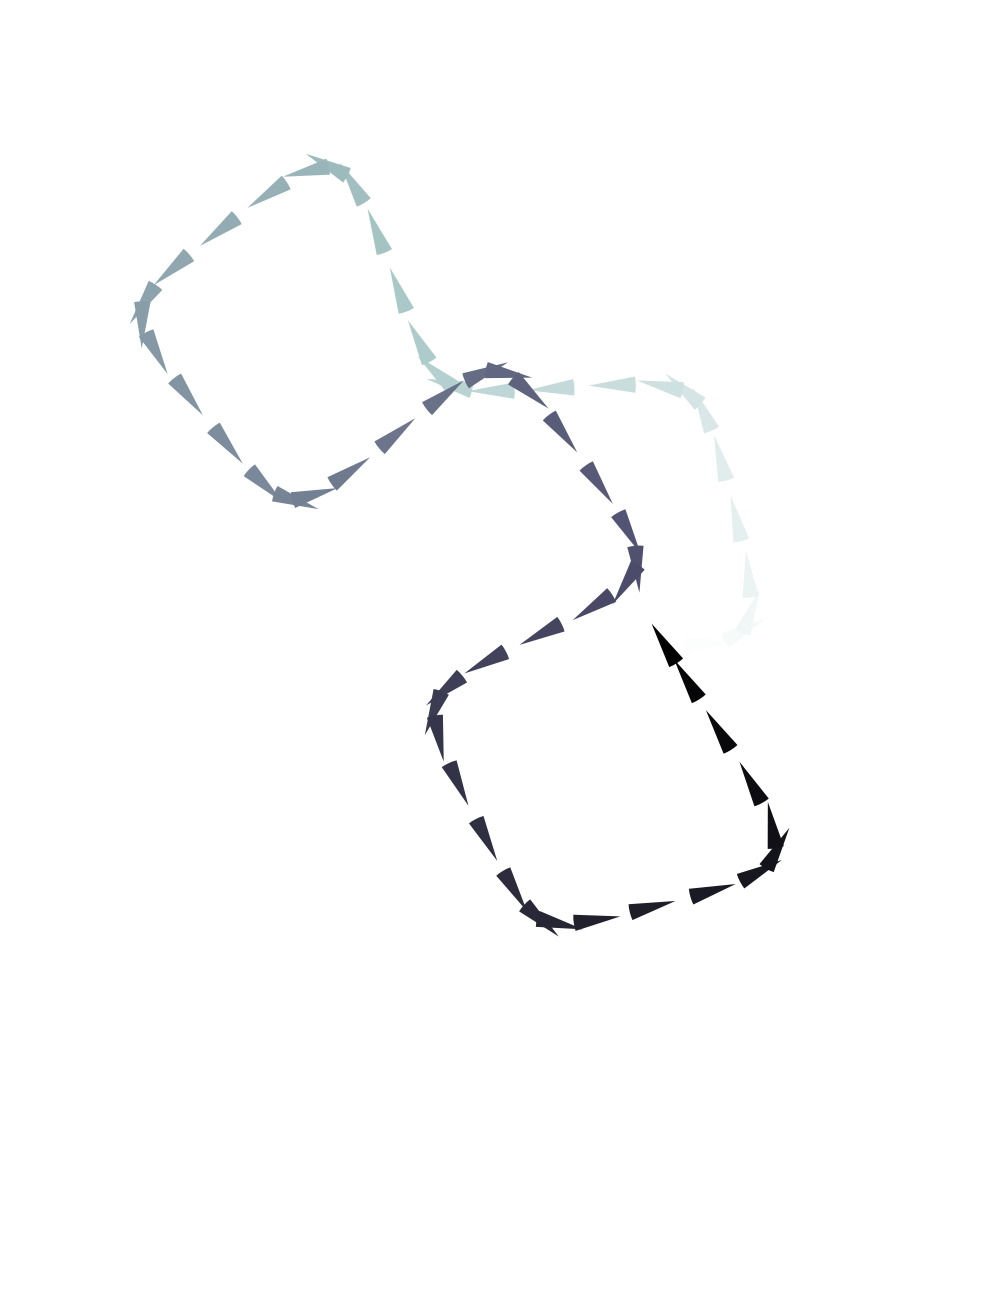

In [6]:
fig = plt.figure(figsize=(3.5,2), dpi=600)
ax = fig.add_subplot(111)
direct_trajectory_simulator.plot_trajec(df, ax=ax, size_radius=0.8, nskip = 8, 
                                        show_wind_quivers=False)


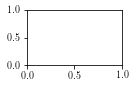

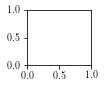

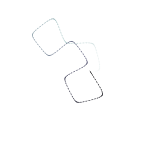

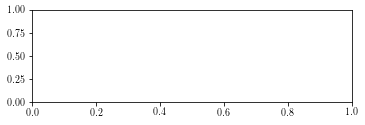

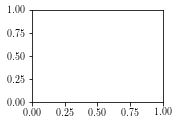

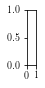

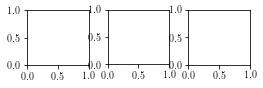

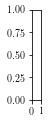

In [7]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])

ax = layout.axes[('trajec', 'trajec')]

#fig = plt.figure(figsize=(3.5,2), dpi=600)
#ax = fig.add_subplot(111)
direct_trajectory_simulator.plot_trajec(df, ax=ax, size_radius=0.4, nskip = 3, 
                                        show_wind_quivers=False)

layout.append_figure_to_layer(layout.figures['trajec'], 'trajec', cleartarget=True)
layout.write_svg(fififig)

# Plot ground speed

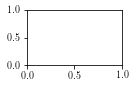

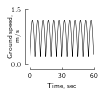

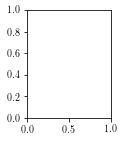

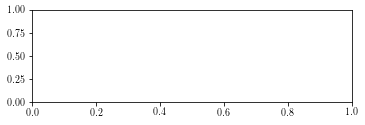

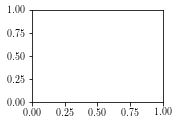

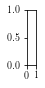

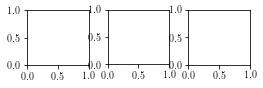

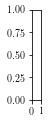

In [8]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])

ax = layout.axes[('groundspeed', 'groundspeed')]

plot_ground_speed(df, ax=ax)

layout.append_figure_to_layer(layout.figures['groundspeed'], 'groundspeed', cleartarget=True)
layout.write_svg(fififig)

# Plot sensors

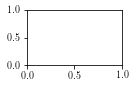

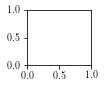

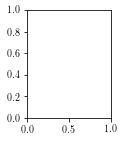

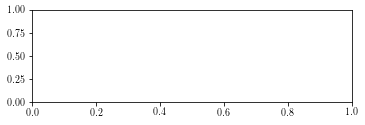

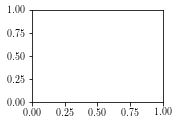

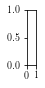

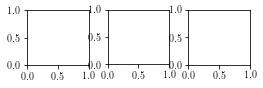

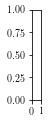

In [9]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])

In [10]:
angular_noise_std = 0.3
sensor = 'gamma'
ax = layout.axes[('sensors', sensor)]

dt = np.mean(np.diff(df.t))
turn_period = (1/psi_freq / 2)
correction_window_for_2pi = int(turn_period/2./dt)

plot_sensor_data(df, angular_noise_std, sensor, psi_freq, show_smooth=True, 
                 correction_window_for_2pi=correction_window_for_2pi, ax=ax,
                 spines=['bottom'], ylabeloffset=-0.05)

Automatically determine params based on 1x turning frequency
Smoothing parameters
Turning freq: 0.1
Butter freq: 0.019999980926513672
Params gamma, psi, phi: 
[4, 0.019999980926513672]
[4, 0.019999980926513672]
[4, 0.019999980926513672]
3


In [11]:
angular_noise_std = 0.3
sensor = 'phi'
ax = layout.axes[('sensors', sensor)]

dt = np.mean(np.diff(df.t))
turn_period = (1/psi_freq / 2)
correction_window_for_2pi = int(turn_period/2./dt)

plot_sensor_data(df, angular_noise_std, sensor, psi_freq, show_smooth=True, 
                 correction_window_for_2pi=correction_window_for_2pi, ax=ax,
                 spines=['left', 'bottom'])

Automatically determine params based on 1x turning frequency
Smoothing parameters
Turning freq: 0.1
Butter freq: 0.019999980926513672
Params gamma, psi, phi: 
[4, 0.019999980926513672]
[4, 0.019999980926513672]
[4, 0.019999980926513672]
2


In [12]:
angular_noise_std = 0.3
sensor = 'psi'
ax = layout.axes[('sensors', sensor)]

dt = np.mean(np.diff(df.t))
turn_period = (1/psi_freq / 2)
correction_window_for_2pi = int(turn_period/2./dt)

plot_sensor_data(df, angular_noise_std, sensor, psi_freq, show_smooth=True, 
                 correction_window_for_2pi=correction_window_for_2pi, ax=ax,
                 spines=['bottom'], ylabeloffset=-0.05)

Automatically determine params based on 1x turning frequency
Smoothing parameters
Turning freq: 0.1
Butter freq: 0.019999980926513672
Params gamma, psi, phi: 
[4, 0.019999980926513672]
[4, 0.019999980926513672]
[4, 0.019999980926513672]
1


In [13]:
layout.append_figure_to_layer(layout.figures['sensors'], 'sensors', cleartarget=True)
layout.write_svg(fififig)

# plot zeta

../data_simulations/20220301_seed1_absine_alignpsi_realdynamic
cvx_windrealdynamic_random_turnamplitude90deg
only finding filenames containing: alignpsi
Filename:  ../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.1_tau10_T10_paramX1.hdf
15000 0.09999990463256836
biggest t:  1499.8985695838928
[ 0  5 10 15 20 25]
[ 0  5 10 15 20 25]
Median error:  0.15249395875461202
median + mean / 2:  0.3720881740912682


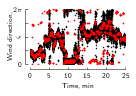

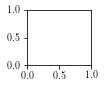

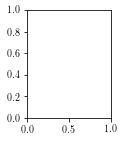

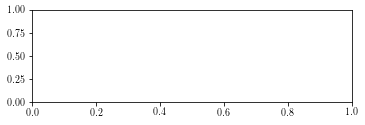

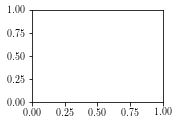

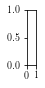

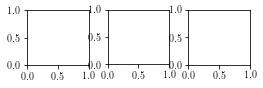

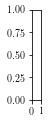

In [15]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('zeta', 'zeta')]


windtype = 'realdynamic'
turn_angle = 90
directory = '../data_simulations/20220301_seed1_absine_alignpsi_realdynamic'
basename= 'cvx_wind' + windtype + '_random_turnamplitude' + str(turn_angle) + 'deg'

filename = plot_example_zeta_timeseries(directory, turn_angle, 0.1, 10, 0.3, Tmultiplier=1, ax=ax, spines=['left', 'bottom'], 
                             windtype='realdynamic', phi_alignment='alignpsi',
                                       return_filename=True)


layout.append_figure_to_layer(layout.figures['zeta'], 'zeta', cleartarget=True)
layout.write_svg(fififig)

# Plot error 

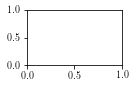

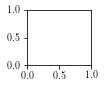

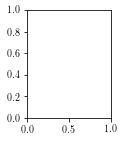

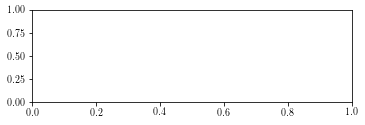

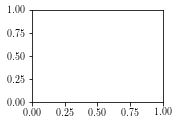

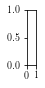

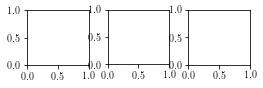

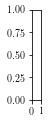

In [16]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[],
                                       dpi=600)

In [17]:
ax = layout.axes[('error', 'error')]

In [18]:
plot_errors(directory, basename, angular_noise_std=0.3, Tmultiplier=1, 
                psi_freq='all', use='median', plot=True, specific_filename=filename, ax=ax)

only finding filenames containing: alignpsi
[0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.1  0.1  0.1  0.1
 0.1  0.5  0.5  0.5  0.5  0.5  1.25 1.25 1.25 1.25 1.25]
15000 0.09999990463256836
cannot import networkx or community


(['../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.1_tau10_T10_paramX1.hdf'],
    psifreq   tau  Tmultipler    error  angular_noise_std  \
 0      0.1  10.0         1.0  0.25338                0.3   
 
                                             filename  
 0  ../data_simulations/20220301_seed1_absine_alig...  )

../data_simulations/20220301_seed1_absine_alignpsi_realdynamic
cvx_windrealdynamic_random_turnamplitude90deg
only finding filenames containing: alignpsi
Filename:  ../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.1_tau10_T50_paramX1.hdf
15000 0.09999990463256836
biggest t:  1499.8985695838928
[ 0  5 10 15 20 25]
[ 0  5 10 15 20 25]
Median error:  0.1624229063713798
median + mean / 2:  0.3511718595135464


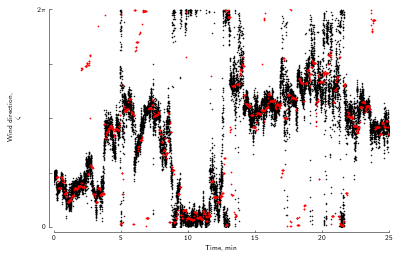

In [20]:
fig = plt.figure()
_ax_ = fig.add_subplot(111)

windtype = 'realdynamic'
turn_angle = 90
directory = '../data_simulations/20220301_seed1_absine_alignpsi_realdynamic'
basename= 'cvx_wind' + windtype + '_random_turnamplitude' + str(turn_angle) + 'deg'

filename = plot_example_zeta_timeseries(directory, 90, 0.1, 10, 0.3, Tmultiplier=5, ax=_ax_, spines=['left', 'bottom'], 
                             windtype='realdynamic', phi_alignment='alignpsi',
                                       return_filename=True)

In [21]:
plot_errors(directory, basename, angular_noise_std=0.3, Tmultiplier=5, 
                psi_freq='all', use='median', plot=True, specific_filename=filename, ax=ax, star_only=True)

only finding filenames containing: alignpsi
[0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.1  0.1  0.1  0.1
 0.1  0.5  0.5  0.5  0.5  0.5  1.25 1.25 1.25 1.25 1.25]
15000 0.09999990463256836


(['../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.1_tau10_T50_paramX1.hdf'],
    psifreq   tau  Tmultipler     error  angular_noise_std  \
 0      0.1  10.0         5.0  0.258139                0.3   
 
                                             filename  
 0  ../data_simulations/20220301_seed1_absine_alig...  )

In [22]:
layout.append_figure_to_layer(layout.figures['error'], 'error', cleartarget=True)
layout.write_svg(fififig)

# Plot all errors

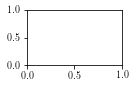

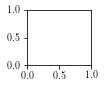

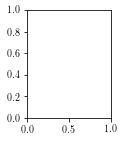

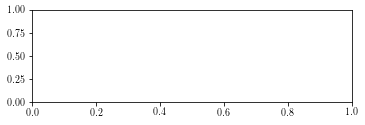

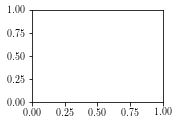

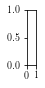

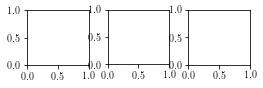

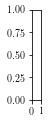

In [23]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[],
                                       dpi=600)

In [24]:
ax = layout.axes[('tau_vs_freq', 'tau_vs_freq')]

In [25]:
plot_errors(directory, basename, angular_noise_std=0.3, Tmultiplier=1, 
                psi_freq='all', use='median', plot=True, specific_filename=None, ax=ax)

plot_errors(directory, basename, angular_noise_std=0.3, Tmultiplier=5, 
                psi_freq='all', use='median', plot=True, specific_filename=None, ax=ax, 
               star_only=True)

only finding filenames containing: alignpsi
[0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.1  0.1  0.1  0.1
 0.1  0.5  0.5  0.5  0.5  0.5  1.25 1.25 1.25 1.25 1.25]
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
[0.01 0.01 0.01 0.01 0.01 0.02 0.02 0.02 0.02 0.02 0.1  0.1  0.1  0.1
 0.1  0.5  0.5  0.5  0.5  0.5  1.25 1.25 1.25 1.25 1.25]
15000 0.

(array(['../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.01_tau0.4_T2.0_paramX1.hdf',
        '../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.01_tau2_T10_paramX1.hdf',
        '../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.01_tau10_T50_paramX1.hdf',
        '../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.01_tau50_T250_paramX1.hdf',
        '../data_simulations/20220301_seed1_absine_alignpsi_realdynamic/cvx_windrealdynamic_random_turnamplitude90deg_absine_alignpsi_angularnoisestd0.3_psifreq0.01_tau250_T1250_paramX1.hdf',
        '../data_simulations/20220301_seed1_absine

In [26]:
layout.append_figure_to_layer(layout.figures['tau_vs_freq'], 'tau_vs_freq', cleartarget=True)
layout.write_svg(fififig)

# Show directory and basename

In [27]:
directory

'../data_simulations/20220301_seed1_absine_alignpsi_realdynamic'

In [28]:
basename

'cvx_windrealdynamic_random_turnamplitude90deg'

# Colorbar

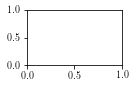

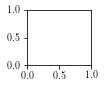

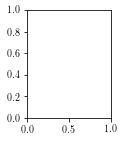

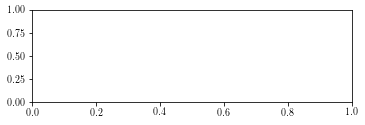

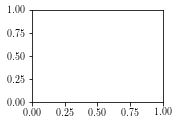

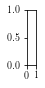

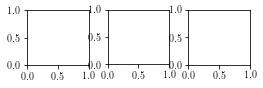

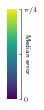

In [29]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])

ax = layout.axes[('colorbar', 'colorbar')]

colorbar(ax=ax, colormap='viridis', orientation='vertical', ticks=[0, np.pi/4.])

yticks = [0, np.pi/8., np.pi/4.]
fifi.mpl_functions.adjust_spines(ax, ['right'], 
                                     yticks=yticks,
                                     tick_length=2.5,
                                     spine_locations={'right': 4},
                                     linewidth=0.5)

ax.set_ylabel('Median error')
ax.set_ylabel("Median error",rotation=-90, labelpad=-17)

ax.set_yticklabels(['$0$', '', '$\pi/4$'])

fifi.mpl_functions.set_fontsize(ax, FONTSIZE)

layout.append_figure_to_layer(layout.figures['colorbar'], 'colorbar', cleartarget=True)
layout.write_svg(fififig)

# Heatmap

only finding filenames containing: alignpsi
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
15000 0.09999990463256836
only finding filenames containing: alignpsi
NEED PYTHON 3.8 and MATPLOTLIB 3.5 FOR CORRECT SHADING!!!
[  0.4   2.   10.   50.  250. ] [0.01 0.02 0.1  0.5  1.25] [[0.87110063 0.75742081 0.71594601 0.57291391 1.11646066]
 [0.71542055 0.59634025 0.47364116 0.63037209 0.59629399]
 [0.52553736 0.3082589  0.251

../code/plot_utility.py:427: RuntimeWarning: invalid value encountered in double_scalars
  slope = (p2[1] - p1[1])/(p2[0] - p1[0])


7.575120233408524 0.3272578158002317 0.21065422245857007


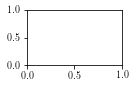

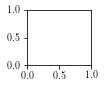

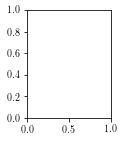

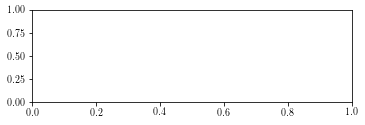

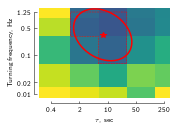

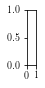

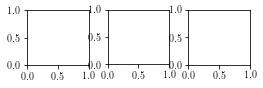

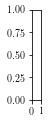

In [30]:
layout = fifi.svg_to_axes.FigureLayout(fififig, 
                                       autogenlayers=True, make_mplfigures=True, hide_layers=[])
ax = layout.axes[('optimal_tau', 'optimal_tau')]

phi_alignment = 'alignpsi'
Tmultiplier = 1
angular_noise_std = 0.3


error_heatmap = get_error_heatmap_for_Tmultiplier(directory,  basename, 
                                          angular_noise_std=angular_noise_std,
                                          Tmultiplier=Tmultiplier,
                                          phi_alignment=phi_alignment,
                                          paramX=1)

plot_error_heatmap(error_heatmap, directory, basename, angular_noise_std=angular_noise_std, 
                           Tmultiplier=1, paramX=1, use='median',
                           phi_alignment=phi_alignment,
                               show_xspine=True, show_yspine=True,
                               show_contour=True, ax=ax,
                             show_turns_per_tau_line=False)
ax.set_xlim(0.2, 350)

layout.append_figure_to_layer(layout.figures['optimal_tau'], 'optimal_tau', cleartarget=True)
layout.write_svg(fififig)

# Display

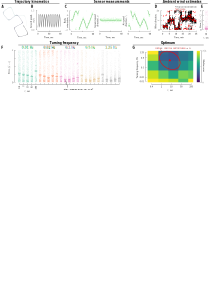

In [31]:
from IPython.display import display,SVG
display(SVG(fififig))